<a href="https://colab.research.google.com/github/mausanch/ecg-classifier-ml-data-clean/blob/main/Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Exportamos los datasets

from google.colab import drive 
import pandas as pd

drive.mount ('/content/drive')
ruta_relativa= '/content/drive/My Drive/Colab Notebooks/datasets/'

global pacientes 
pacientes = []

Mounted at /content/drive


In [ ]:
# Agregamos los nombres de las columnas correspondientes al dataset de la UCI
columnas_UCI = [
               'age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval' ,'Q-T interval', 'T interval', 'P interval','QRS', 'T', 'P','QRST','J','Heart rate', #General
               
               'Q wave DI', 'R wave DI','S wave DI', 'R- wave DI', 'S- wave DI', 'Number of intrinsic deflections DI', 'Existence of ragged R wave DI', 'Existence of diphasic derivation of R wave DI', 'Existence of ragged P wave DI', 'Existence of diphasic derivation of P wave DI', 'Existence of ragged T wave DI', 'Existence of diphasic derivation of T wave DI', #D1
               'Q wave DII', 'R wave DII','S wave DII', 'R- wave DII', 'S- wave DII', 'Number of intrinsic deflections DII', 'Existence of ragged R wave DII', 'Existence of diphasic derivation of R wave DII', 'Existence of ragged P wave DII', 'Existence of diphasic derivation of P wave DII', 'Existence of ragged T wave DII', 'Existence of diphasic derivation of T wave DII', #D1
               'Q wave DIII', 'R wave DIII','S wave DIII', 'R- wave DIII', 'S- wave DIII', 'Number of intrinsic deflections DIII', 'Existence of ragged R wave DIII', 'Existence of diphasic derivation of R wave DIII', 'Existence of ragged P wave DIII', 'Existence of diphasic derivation of P wave DIII', 'Existence of ragged T wave DIII', 'Existence of diphasic derivation of T wave DIII', #DII
               'Q wave AVR', 'R wave AVR','S wave AVR', 'R- wave AVR', 'S- wave AVR', 'Number of intrinsic deflections AVR', 'Existence of ragged R wave AVR', 'Existence of diphasic derivation of R wave AVR', 'Existence of ragged P wave AVR', 'Existence of diphasic derivation of P wave AVR', 'Existence of ragged T wave AVR', 'Existence of diphasic derivation of T wave AVR', #AVR
               'Q wave AVL', 'R wave AVL','S wave AVL', 'R- wave AVL', 'S- wave AVL', 'Number of intrinsic deflections AVL', 'Existence of ragged R wave AVL', 'Existence of diphasic derivation of R wave AVL', 'Existence of ragged P wave AVL', 'Existence of diphasic derivation of P wave AVL', 'Existence of ragged T wave AVL', 'Existence of diphasic derivation of T wave AVL', #AVL
               'Q wave AVF', 'R wave AVF','S wave AVF', 'R- wave AVF', 'S- wave AVF', 'Number of intrinsic deflections AVF', 'Existence of ragged R wave AVF', 'Existence of diphasic derivation of R wave AVF', 'Existence of ragged P wave AVF', 'Existence of diphasic derivation of P wave AVF', 'Existence of ragged T wave AVF', 'Existence of diphasic derivation of T wave AVF', #AVF
               'Q wave V1', 'R wave V1','S wave V1', 'R- wave V1', 'S- wave V1', 'Number of intrinsic deflections V1', 'Existence of ragged R wave V1', 'Existence of diphasic derivation of R wave V1', 'Existence of ragged P wave V1', 'Existence of diphasic derivation of P wave V1', 'Existence of ragged T wave V1', 'Existence of diphasic derivation of T wave V1', #V1
               'Q wave V2', 'R wave V2','S wave V2', 'R- wave V2', 'S- wave V2', 'Number of intrinsic deflections V2', 'Existence of ragged R wave V2', 'Existence of diphasic derivation of R wave V2', 'Existence of ragged P wave V2', 'Existence of diphasic derivation of P wave V2', 'Existence of ragged T wave V2', 'Existence of diphasic derivation of T wave V2', #V2
               'Q wave V3', 'R wave V3','S wave V3', 'R- wave V3', 'S- wave V3', 'Number of intrinsic deflections V3', 'Existence of ragged R wave V3', 'Existence of diphasic derivation of R wave V3', 'Existence of ragged P wave V3', 'Existence of diphasic derivation of P wave V3', 'Existence of ragged T wave V3', 'Existence of diphasic derivation of T wave V3', #V3
               'Q wave V4', 'R wave V4','S wave V4', 'R- wave V4', 'S- wave V4', 'Number of intrinsic deflections V4', 'Existence of ragged R wave V4', 'Existence of diphasic derivation of R wave V4', 'Existence of ragged P wave V4', 'Existence of diphasic derivation of P wave V4', 'Existence of ragged T wave V4', 'Existence of diphasic derivation of T wave V4', #V4
               'Q wave V5', 'R wave V5','S wave V5', 'R- wave V5', 'S- wave V5', 'Number of intrinsic deflections V5', 'Existence of ragged R wave V5', 'Existence of diphasic derivation of R wave V5', 'Existence of ragged P wave V5', 'Existence of diphasic derivation of P wave V5', 'Existence of ragged T wave V5', 'Existence of diphasic derivation of T wave V5', #V5
               'Q wave V6', 'R wave V6','S wave V6', 'R- wave V6', 'S- wave V6', 'Number of intrinsic deflections V6', 'Existence of ragged R wave V6', 'Existence of diphasic derivation of R wave V6', 'Existence of ragged P wave V6', 'Existence of diphasic derivation of P wave V6', 'Existence of ragged T wave V6', 'Existence of diphasic derivation of T wave V6', #V6
           
               'Amp JJ wave DI', 'Amp Q wave DI', 'Amp R wave DI', 'Amp S wave DI','Amp R- wave DI','Amp S- wave DI','Amp P wave DI','Amp T wave DI','QRSA DI', 'QRSTA DI', #DI
               'Amp JJ wave DII', 'Amp Q wave DII', 'Amp R wave DII', 'Amp S wave DII','Amp R- wave DII','Amp S- wave DII','Amp P wave DII','Amp T wave DII','QRSA DII', 'QRSTA DII', #DII
               'Amp JJ wave DIII', 'Amp Q wave DIII', 'Amp R wave DIII', 'Amp S wave DIII','Amp R- wave DIII','Amp S- wave DIII','Amp P wave DIII','Amp T wave DIII','QRSA DIII', 'QRSTA DIII', #DIII
               'Amp JJ wave AVR', 'Amp Q wave AVR', 'Amp R wave AVR', 'Amp S wave AVR','Amp R- wave AVR','Amp S- wave AVR','Amp P wave AVR','Amp T wave AVR','QRSA AVR', 'QRSTA AVR', #AVR
               'Amp JJ wave AVL', 'Amp Q wave AVL', 'Amp R wave AVL', 'Amp S wave AVL','Amp R- wave AVL','Amp S- wave AVL','Amp P wave AVL','Amp T wave AVL','QRSA AVL', 'QRSTA AVL', #AVL
               'Amp JJ wave AVF', 'Amp Q wave AVF', 'Amp R wave AVF', 'Amp S wave AVF','Amp R- wave AVF','Amp S- wave AVF','Amp P wave AVF','Amp T wave AVF','QRSA AVF', 'QRSTA AVF', #AVF
               'Amp JJ wave V1', 'Amp Q wave V1', 'Amp R wave V1', 'Amp S wave V1','Amp R- wave V1','Amp S- wave V1','Amp P wave V1','Amp T wave V1','QRSA V1', 'QRSTA V1', #V1
               'Amp JJ wave V2', 'Amp Q wave V2', 'Amp R wave V2', 'Amp S wave V2','Amp R- wave V2','Amp S- wave V2','Amp P wave V2','Amp T wave V2','QRSA V2', 'QRSTA V2', #V2
               'Amp JJ wave V3', 'Amp Q wave V3', 'Amp R wave V3', 'Amp S wave V3','Amp R- wave V3','Amp S- wave V3','Amp P wave V3','Amp T wave V3','QRSA V3', 'QRSTA V3', #V3
               'Amp JJ wave V4', 'Amp Q wave V4', 'Amp R wave V4', 'Amp S wave V4','Amp R- wave V4','Amp S- wave V4','Amp P wave V4','Amp T wave V4','QRSA V4', 'QRSTA V4', #V4
               'Amp JJ wave V5', 'Amp Q wave V5', 'Amp R wave V5', 'Amp S wave V5','Amp R- wave V5','Amp S- wave V5','Amp P wave V5','Amp T wave V5','QRSA V5', 'QRSTA V5', #V5
               'Amp JJ wave V6', 'Amp Q wave V6', 'Amp R wave V6', 'Amp S wave V6','Amp R- wave V6','Amp S- wave V6','Amp P wave V6','Amp T wave V6','QRSA V6', 'QRSTA V6', #V6
                
                'Class code'
               ] 
# UCI
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/UCI/arrhythmia-details.data', names=columnas_UCI) #Leemos el dataset y agregamos el header con el nombre de la columna

In [ ]:
data.head() # Desplegamos las primeras filas 

,age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,Q wave DI,R wave DI,S wave DI,R- wave DI,S- wave DI,Number of intrinsic deflections DI,Existence of ragged R wave DI,Existence of diphasic derivation of R wave DI,Existence of ragged P wave DI,Existence of diphasic derivation of P wave DI,Existence of ragged T wave DI,Existence of diphasic derivation of T wave DI,Q wave DII,R wave DII,S wave DII,R- wave DII,S- wave DII,Number of intrinsic deflections DII,Existence of ragged R wave DII,Existence of diphasic derivation of R wave DII,Existence of ragged P wave DII,Existence of diphasic derivation of P wave DII,Existence of ragged T wave DII,Existence of diphasic derivation of T wave DII,Q wave DIII,...,Amp Q wave V3,Amp R wave V3,Amp S wave V3,Amp R- wave V3,Amp S- wave V3,Amp P wave V3,Amp T wave V3,QRSA V3,QRSTA V3,Amp JJ wave V4,Amp Q wave V4,Amp R wave V4,Amp S wave V4,Amp R- wave V4,Amp S- wave V4,Amp P wave V4,Amp T wave V4,QRSA V4,QRSTA V4,Amp JJ wave V5,Amp Q wave V5,Amp R wave V5,Amp S wave V5,Amp R- wave V5,Amp S- wave V5,Amp P wave V5,Amp T wave V5,QRSA V5,QRSTA V5,Amp JJ wave V6,Amp Q wave V6,Amp R wave V6,Amp S wave V6,Amp R- wave V6,Amp S- wave V6,Amp P wave V6,Amp T wave V6,QRSA V6,QRSTA V6,Class code
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.shape # Desplegamos la cantidad de filas y columnas

(452, 280)

In [ ]:
data.columns # Desplegamos el nombre de cada columna

Index(['age', 'Sex', 'Height', 'Weight', 'QRS duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS',
       ...
       'Amp Q wave V6', 'Amp R wave V6', 'Amp S wave V6', 'Amp R- wave V6',
       'Amp S- wave V6', 'Amp P wave V6', 'Amp T wave V6', 'QRSA V6',
       'QRSTA V6', 'Class code'],
      dtype='object', length=280)

In [ ]:
data.info() # Desplegamos el tipo de cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to Class code
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
data.describe() # 

,age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,Q wave DI,R wave DI,S wave DI,R- wave DI,S- wave DI,Number of intrinsic deflections DI,Existence of ragged R wave DI,Existence of diphasic derivation of R wave DI,Existence of ragged P wave DI,Existence of diphasic derivation of P wave DI,Existence of ragged T wave DI,Existence of diphasic derivation of T wave DI,Q wave DII,R wave DII,S wave DII,R- wave DII,S- wave DII,Number of intrinsic deflections DII,Existence of ragged R wave DII,Existence of diphasic derivation of R wave DII,Existence of ragged P wave DII,Existence of diphasic derivation of P wave DII,Existence of ragged T wave DII,Existence of diphasic derivation of T wave DII,Q wave DIII,R wave DIII,S wave DIII,R- wave DIII,S- wave DIII,Number of intrinsic deflections DIII,...,Amp Q wave V3,Amp R wave V3,Amp S wave V3,Amp R- wave V3,Amp S- wave V3,Amp P wave V3,Amp T wave V3,QRSA V3,QRSTA V3,Amp JJ wave V4,Amp Q wave V4,Amp R wave V4,Amp S wave V4,Amp R- wave V4,Amp S- wave V4,Amp P wave V4,Amp T wave V4,QRSA V4,QRSTA V4,Amp JJ wave V5,Amp Q wave V5,Amp R wave V5,Amp S wave V5,Amp R- wave V5,Amp S- wave V5,Amp P wave V5,Amp T wave V5,QRSA V5,QRSTA V5,Amp JJ wave V6,Amp Q wave V6,Amp R wave V6,Amp S wave V6,Amp R- wave V6,Amp S- wave V6,Amp P wave V6,Amp T wave V6,QRSA V6,QRSTA V6,Class code
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,20.327434,2.300885,0.318584,30.513274,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,25.365424,9.212818,3.124229,18.359850,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0



# Limpieza de datos
Binarias

*   Binarias: Sexo
*   Categoricas: Class Code 
*   Continuas: Todas las demás



In [ ]:
data.nunique()

age               77
Sex                2
Height            53
Weight            76
QRS duration      67
                ... 
Amp P wave V6     24
Amp T wave V6     71
QRSA V6          286
QRSTA V6         332
Class code        13
Length: 280, dtype: int64

In [ ]:
data.dtypes

age                int64
Sex                int64
Height             int64
Weight             int64
QRS duration       int64
                  ...   
Amp P wave V6    float64
Amp T wave V6    float64
QRSA V6          float64
QRSTA V6         float64
Class code         int64
Length: 280, dtype: object

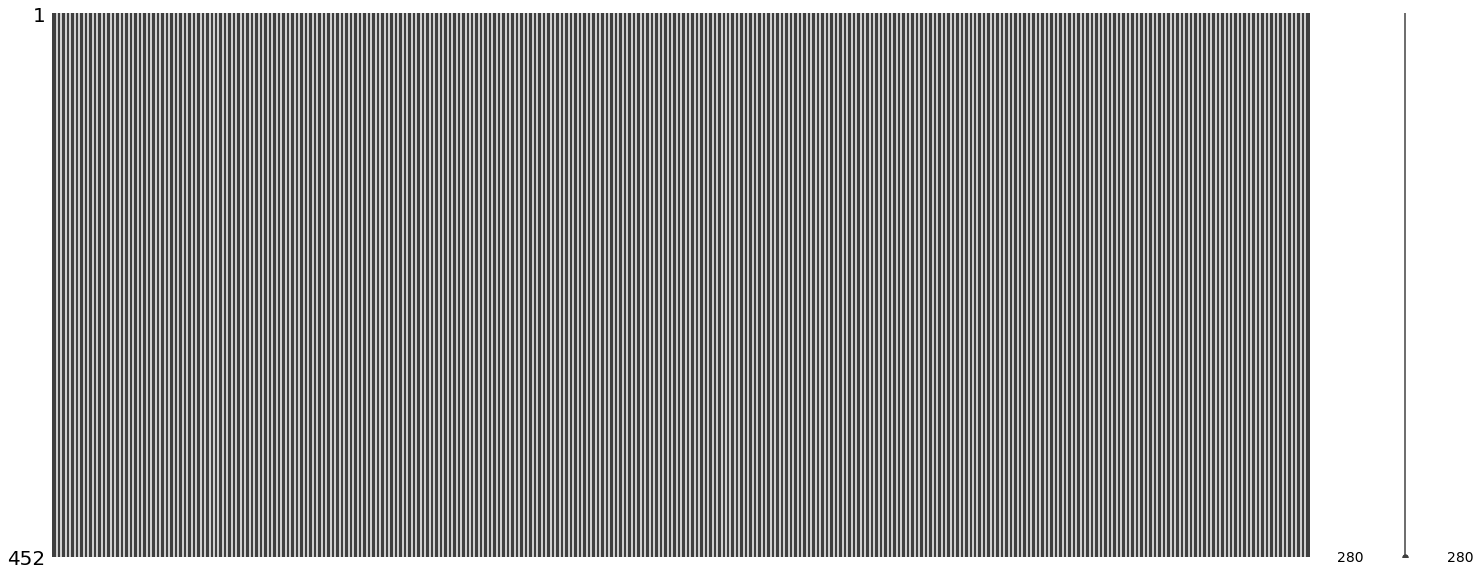

In [ ]:
import missingno as msno
msno.matrix(data)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


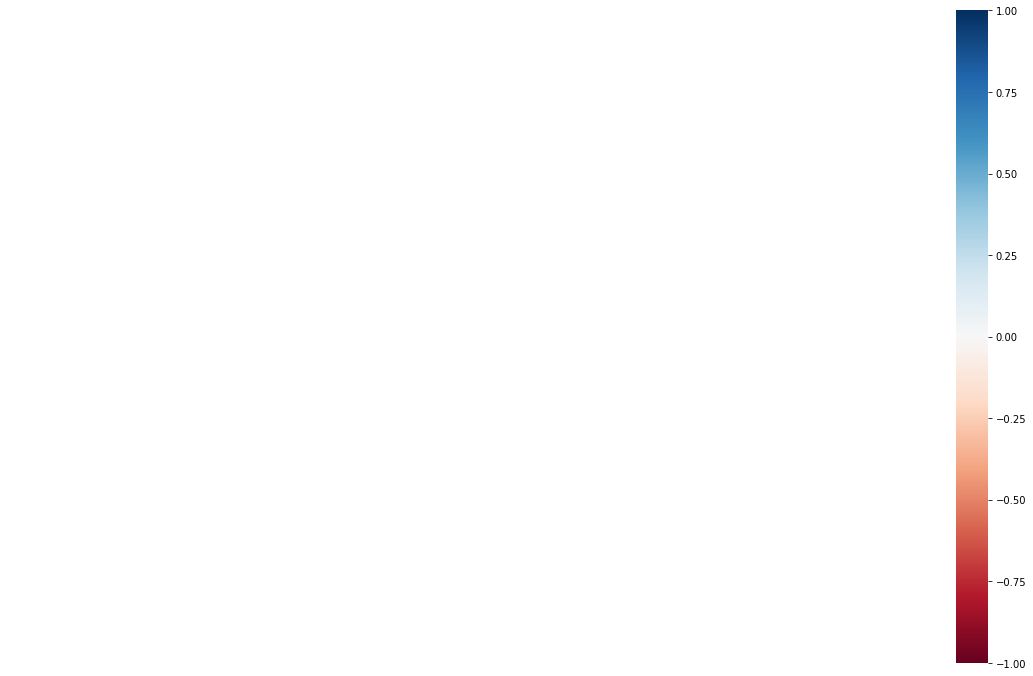

In [ ]:
msno.heatmap(data)

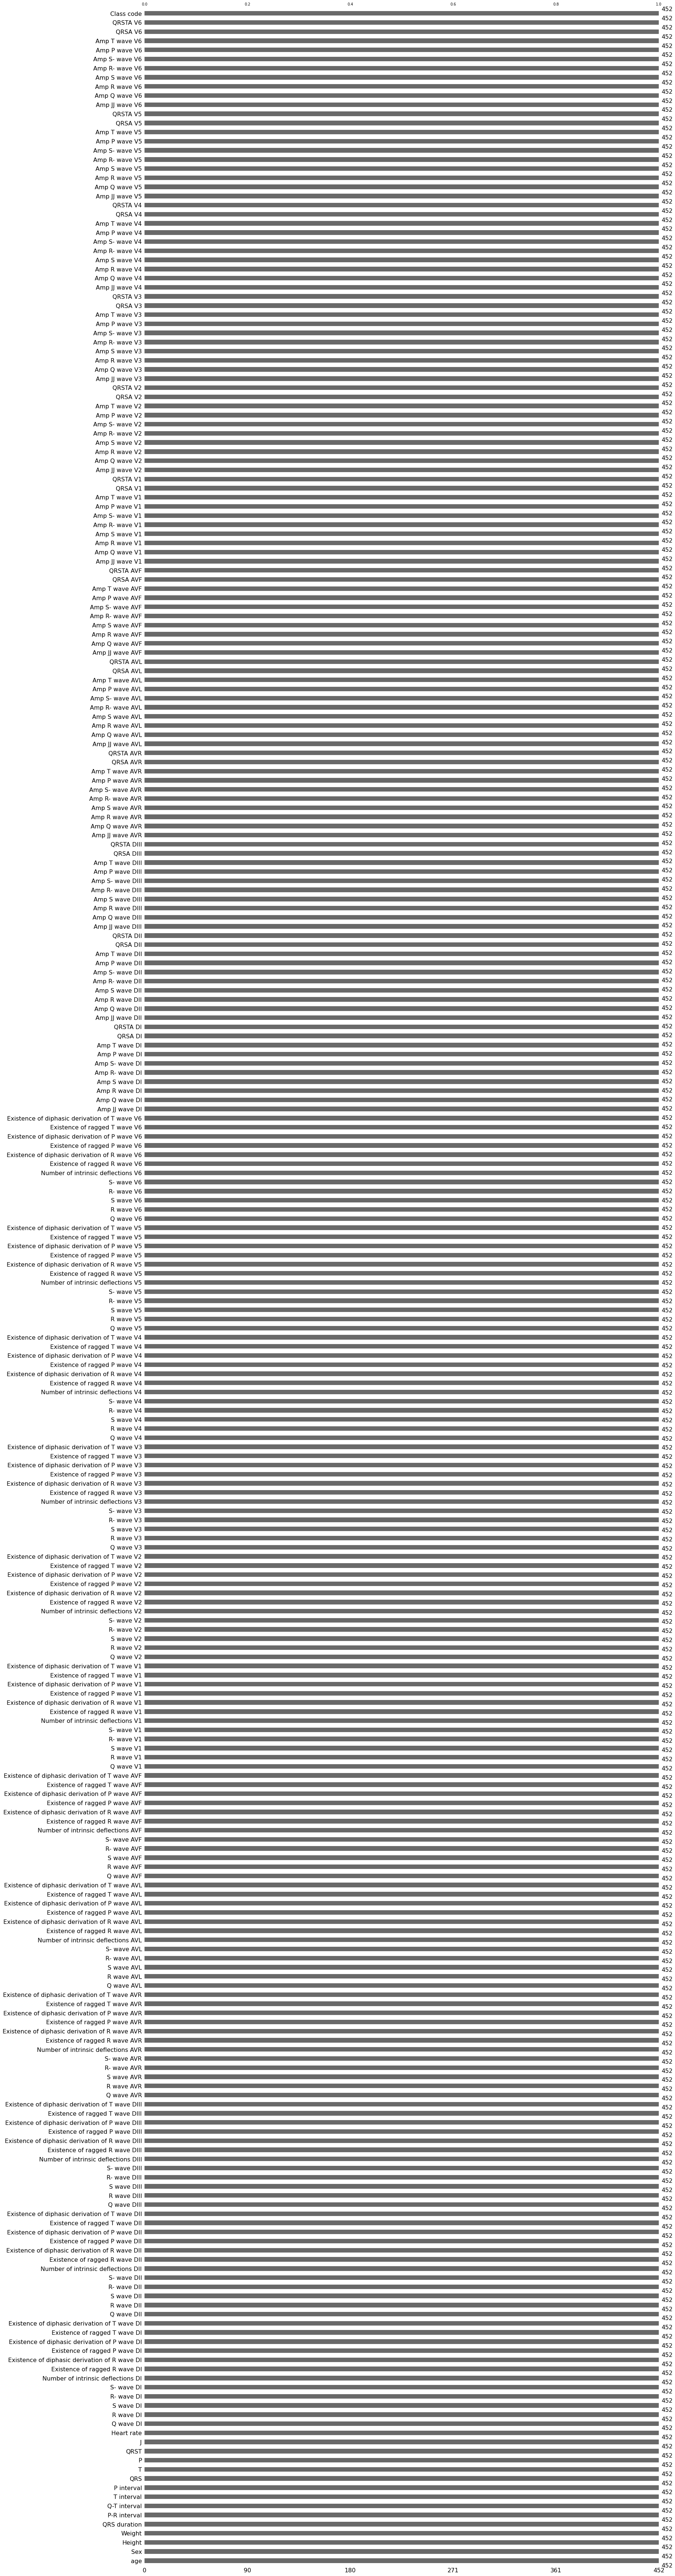

In [ ]:
msno.bar(data)

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
# Mendeley
import scipy.io 

scipy.io.loadmat(ruta_relativa+ 'Mendeley/signal-details/1 (1).mat') 

{'__globals__': [],
 '__header__': b'MATLAB 5.0',
 '__version__': '1.0',
 'val': array([[-730,   61,  109, ...,  117,  114,   68]], dtype=int16)}

In [ ]:
%matplotlib inline
# Mendeley
import os
import scipy.io 
import numpy as np
# Sirve para leer archivos de forma optimizada
import linecache
path = ruta_relativa+ 'Mendeley/patient-details'

mendeley_pacientes = os.listdir(path)
for paciente in mendeley_pacientes:
    linea_1 = str (linecache.getline(ruta_relativa+'Mendeley/patient-details/'+paciente, 3))

    if ((linea_1.find('<age>')>0)):
      atributos=linea_1.split(' ')
      if (atributos[3] == 'M'):
        atributos[3]=1
      else:
        atributos[3]=0
      paciente_valido=True
      
    identificador=paciente.split('.txt')[0]
    try:
      señal = list ( scipy.io.loadmat('/content/drive/My Drive/Colab Notebooks/datasets/Mendeley/signal-details/'+identificador+'.mat')['val'][0])
      if (paciente_valido):
        pacientes.append({
            "edad":atributos[1],
            "sexo":atributos[3],
            "fs": 360,
            "muestras":3600,
            "derivacion": 'I',
            "patologia": 'N/A',
            "signal": señal
            })    
    except:
      pass
    paciente_valido=False

print (pacientes[0]) 

{'edad': '71', 'sexo': 1, 'fs': 360, 'muestras': 3600, 'derivacion': 'I', 'patologia': 'N/A', 'signal': [-730, 61, 109, -77, -7, 108, 12, -92, -34, 35, 19, 11, 15, -35, -61, 23, 114, 98, 31, -5, -25, -33, 1, 32, 6, -34, -32, -15, -13, -10, -7, -30, -49, -15, 42, 55, 28, 8, 1, -9, -9, 9, 16, -6, -27, -7, 29, 28, -13, -41, -25, 2, 4, -3, 3, 12, 16, 25, 39, 33, 7, -11, -11, -11, -15, -10, -9, -23, -33, -19, 5, 15, 18, 23, 16, -5, -5, 20, 28, 0, -22, -1, 37, 43, 17, -2, 3, 9, -9, -40, -51, -30, 4, 30, 41, 36, 13, -13, -17, 0, 16, 16, 5, -10, -18, -3, 25, 35, 12, -8, 5, 39, 55, 36, 3, -10, 4, 15, 4, -7, 0, 9, 2, -5, 2, 8, 7, 24, 55, 68, 56, 48, 47, 38, 36, 60, 73, 42, 9, 19, 47, 46, 30, 26, 16, -13, -28, -13, -3, -22, -42, -30, -2, 13, 16, 10, -8, -36, -59, -68, -62, -42, -18, -3, 21, 102, 244, 371, 425, 453, 523, 594, 579, 500, 443, 390, 249, 35, -131, -199, -239, -284, -302, -284, -276, -287, -283, -252, -214, -188, -191, -225, -251, -229, -185, -176, -205, -226, -225, -217, -203, -171, -

In [ ]:
pip install wfdb

     |████████████████████████████████| 137 kB 8.4 MB/s 
     |████████████████████████████████| 10.3 MB 36.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Physionet

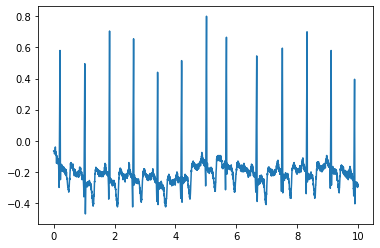

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
x=scipy.io.loadmat(ruta_relativa +'/MIT/mats/100m.mat')
ecg=(x['val']-0)/200
ecg=np.transpose(ecg)
fs=360
ts=1/fs
t=np.linspace(0, np.size(ecg), np.size(ecg))*ts
plt.plot(t, ecg)
plt.show()

In [ ]:
#pip install wfdb
import wfdb
record = wfdb.rdrecord('sample_data/100', sampto = 15000)
annotation = wfdb.rdann('sample_data/100', 'atr', sampto = 15000)
display(record.p_signal[0])
ecg_record = wfdb.rdheader('sample_data/100')
display(ecg_record.__dict__)

FileNotFoundError: ignored

In [ ]:
wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds')

In [ ]:
import csv
import os
import wfdb
import numpy as np

leer_cabeceras_MIT=[]
cabeceras_MIT=[]
edad=[]
sexo=[]
fs=[]
muestras=3600
derivacion =[] 
signal_en_csv=[]
amplitud = []


#se guardan los archivos 100.hea en leer_cabeceras_MIT
leer_cabeceras_MIT = os.listdir(ruta_relativa+'MIT/hea/')
leer_cabeceras_MIT.sort(reverse = False)


print(len(leer_cabeceras_MIT))
#se remueve el .hea de los archivos y se guarda el nombre en cabeceras_MIT
for cabecera in leer_cabeceras_MIT:
  cabecera=cabecera.replace(".hea", "")
  cabeceras_MIT.append(cabecera)

print(cabeceras_MIT)

#se extrae sa informacion del paciente


for cabecera in cabeceras_MIT:
  info_paciente = wfdb.rdheader(ruta_relativa+'MIT/hea/'+cabecera)
  edad.append(info_paciente.comments[0].split(' ')[0])
  sexo.append(info_paciente.comments[0].split(' ')[1])
  fs.append(info_paciente.fs)

#se extrae info del paciente desde el csv
registros_MIT = os.listdir(ruta_relativa+'MIT/csv/')
registros_MIT.sort(reverse = False)
print(registros_MIT)


for registro in registros_MIT:
 with open(ruta_relativa+'MIT/csv/'+registro, newline='') as archivo_csv:  
    lector = csv.reader(archivo_csv)
    lista_de_pacientes = list(csv.reader(archivo_csv)) #convierte CSV a lista
    derivacion.append(lista_de_pacientes[0][1])
    signal_en_csv.append(lista_de_pacientes[2:])
    #amplitud.append(signal_en_csv[])

print(edad)
print(sexo)
print(fs)
print(muestras)
print(derivacion)
print(signal_en_csv[1])

for i in range(len(registros_MIT)):
  amplitud_por_signal=[]
  for j in range(len(signal_en_csv[i])):
    amplitud_por_signal.append(signal_en_csv[i][j][1])
  amplitud.append(amplitud_por_signal)
print(amplitud[0])


''' for i in range(48):
  pacientes.append({"edad": edad[i],
                 "sexo": sexo[i],
                 "fs": fs[i],
                 "muestras": muestras,
                 "derivacion": derivacion[i],
                 "patologia": 'N/A',
                 "signal": amplitud[i]
                }) '''

In [ ]:
import json

print(json.dumps(pacientes[1], sort_keys=False, indent=4))